In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("budincsevity/szeged-weather")

print("Path to dataset files:", path)

100%|██████████| 2.23M/2.23M [00:00<00:00, 71.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/budincsevity/szeged-weather/versions/1


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn import metrics
import seaborn as sns
from time import perf_counter

In [3]:
df_cols = ['Precip Type','Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)']

In [4]:
df = pd.read_csv(path+'/weatherHistory.csv')
df = df[df_cols]
df = df.dropna()
df['Precip Type'] = df['Precip Type'].map({'rain': 0, 'snow': 1})

In [5]:
df.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [6]:
df.shape

(95936, 8)

In [7]:
df.describe()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000
mean,0.111658,11.940976,10.862531,0.734841,10.804936,187.518773,10.362402,1003.150038
std,0.314947,9.570671,10.717812,0.195724,6.920727,107.385351,4.173780,117.276976
min,0.000000,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.604167,2.276389,0.600000,5.796000,116.000000,8.372000,1011.890000
50%,0.000000,12.033333,12.033333,0.780000,9.933700,180.000000,10.046400,1016.420000
75%,0.000000,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,1021.050000
max,1.000000,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [8]:
df.corr()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Precip Type,1.000000,-0.563503,-0.566058,0.232622,-0.067771,-0.042142,-0.316483,0.009271
Temperature (C),-0.563503,1.000000,0.992637,-0.632148,0.008304,0.029937,0.393719,-0.005253
Apparent Temperature (C),-0.566058,0.992637,1.000000,-0.602390,-0.057387,0.028951,0.382589,-0.000037
Humidity,0.232622,-0.632148,-0.602390,1.000000,-0.224569,0.000814,-0.370511,0.005375
Wind Speed (km/h),-0.067771,0.008304,-0.057387,-0.224569,1.000000,0.104366,0.100801,-0.049453
Wind Bearing (degrees),-0.042142,0.029937,0.028951,0.000814,0.104366,1.000000,0.048900,-0.011629
Visibility (km),-0.316483,0.393719,0.382589,-0.370511,0.100801,0.048900,1.000000,0.061011
Pressure (millibars),0.009271,-0.005253,-0.000037,0.005375,-0.049453,-0.011629,0.061011,1.000000


In [9]:
df.isnull().sum()

,0
Precip Type,0
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Pressure (millibars),0


In [10]:
df.nunique()

,0
Precip Type,2
Temperature (C),7573
Apparent Temperature (C),8984
Humidity,90
Wind Speed (km/h),2484
Wind Bearing (degrees),360
Visibility (km),949
Pressure (millibars),4971


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, 'Precip Type'),
  Text(0, 1.5, 'Temperature (C)'),
  Text(0, 2.5, 'Apparent Temperature (C)'),
  Text(0, 3.5, 'Humidity'),
  Text(0, 4.5, 'Wind Speed (km/h)'),
  Text(0, 5.5, 'Wind Bearing (degrees)'),
  Text(0, 6.5, 'Visibility (km)'),
  Text(0, 7.5, 'Pressure (millibars)')])

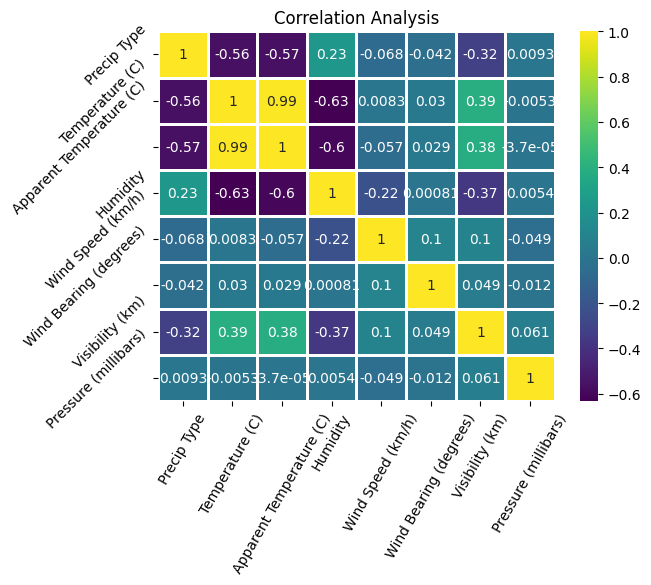

In [11]:
plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(df.corr(), annot=True, lw=1, linecolor='white', cmap='viridis')
plt.xticks(rotation=60)
plt.yticks(rotation=45)

In [12]:
df.drop_duplicates()
df.shape

(95936, 8)

In [13]:
X = df.loc[:, 'Apparent Temperature (C)']
X = X.values.reshape((-1, 1))
print(X.shape)

(95936, 1)


In [14]:
y = df.loc[:, 'Temperature (C)']
y = y.values.reshape((-1, 1))
print(y.shape)

(95936, 1)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
lasso = Lasso(alpha = 0.05)

In [17]:
t1 = perf_counter()
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
t2 = perf_counter()
print("Time: ", t2-t1)

Time:  0.02618619099999364


In [18]:
print('MAE = ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE = ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = lasso.score(X_train, y_train)
print('R2 = ', r2)

MAE =  0.8826074425198279
MSE =  1.343781172604643
RMSE =  1.1592157575726112
R2 =  0.9853355615822638
